### 3. boost muons four-momenta in the laboratory frame, i.e. in the frame where the electron is at rest and the positron has enough energy to give rise to the process;

Muon pair production will only occur if the center of mass energy has enough energy to account for two muons i.e it meets the condition that $\sqrt{s} \geq 2m_\mu $. 

<div>
    <center>
        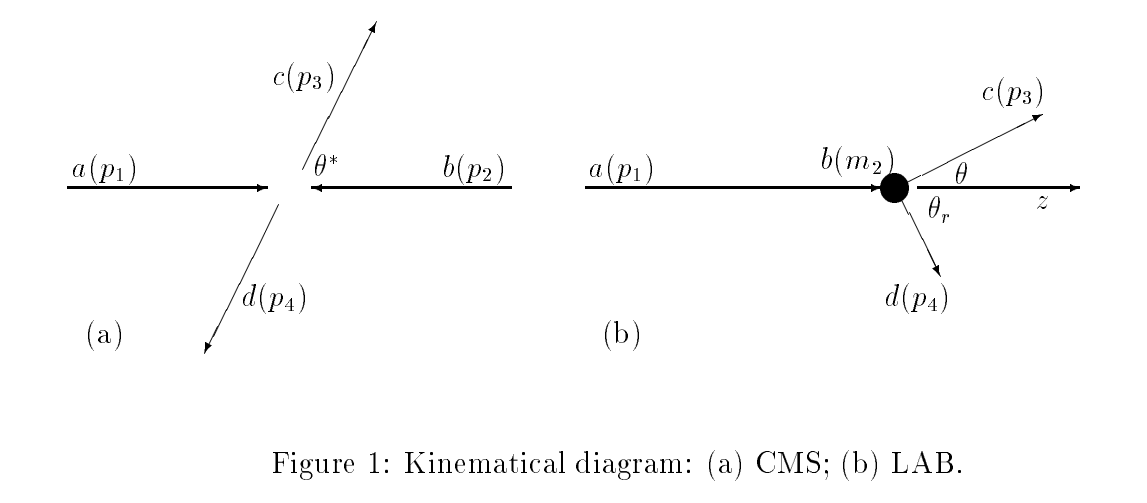
    </center>
</div> 

---
 ### Center of mass frame

The centre of mass frame is defined such that the sum of the momentum must be zero. This is true for the incoming particles and therefore has to be true for the outgoing.

$$0=\sum_{i}{\vec{p}_{i}}$$

$$\vec{p}_{e^+}=-\vec{p}_{e^-}$$


$$p_{e^+}=\left(E_{e^+}, \vec{p}_{e^+}\right), \quad p_{e^-}=\left(E_{e^-}, \vec{p}_{e^-}\right), \quad $$
Adding these momentum in the matrix addition$s$ the opposite momentum cancel
$$s=\left(p_{e^+}+p_{e^-}\right)^{2}=\left(E_{e^+}+E_{e^-}, 0\right)^{2}=4 E^{2}$$


$$E=E_{e^+}=E_{e^-} \therefore \sqrt{s}=2 E$$

The energy available to the muon pair must be half of the center of mass energy. Note for convenicence  $m_\mu$ used here is the muon rest mass.  

$$E_\mu= \frac{s}{2} =\sqrt{p_\mu^{2} +m_{\mu}^{2}} \therefore |p_\mu| =\sqrt{\frac{s}{4} -m_\mu^2} $$ 


 ### Lab frame


Lab frame: is the frame that contains a particle at rest, in this experiment this is the stationary electron in the beryllium target. Note in this project system is defined such that the positron beam travels in  $z$.

$$p_{e^+}=\left(\begin{array}{c}
E  \\
0 \\
0 \\
p_z
\end{array}\right), \phantom{fillll}   p_{e^-}=\left(\begin{array}{c}
m_{e}
\\
0 \\
0 \\
0
\end{array}\right)$$

$$
p_{e^+} + p_{e^-}=\left(\begin{array}{c}
E+m_{e} \\
0\\
0 \\
p_z
\end{array}\right)$$

$$
s=(p_{e^+} + p_{e^-})^2= E^2 +2m_{e}E+ m_e^2 - p_z^2 $$

Remebering that  
 $$E^2 = p^2+m^2 \therefore p^2 = E^2-m^2$$
 Gives  
 $$s=2m_eE+2m_e^2 \approx 2m_eE$$


### Transforming between frames

We can obtain the Lorentz boost factor $\gamma$ by comparing the positron beam energy $E_{L A B}$ with the total centre of mass energy $\sqrt s$  through the following relation.

$$\gamma_{c m}=\left(E_{L A B}+m_{2}\right) / \sqrt{s}$$

In a simlar fashion  

$$v_{c m}=p_{L A B} /\left(E_{L A B}+m_{2}\right)$$

The center of mass frame is moving away from the lab frame in the $z$ axis with $v_z$ the change in $p_z$ can be calculated using standard momentum boost formulas as follows.

\begin{align} p'_z &= \gamma (p_z - E v/c^2) \end{align}
\begin{align} p_z &= \gamma (p_z' + E' v/c^2) \end{align}

The boosted energy can be derived from the relation $E^2 = p^2+m^2$ where in this formula $p$ is the 3 momentum  
<sub>**Diagrams and a useful sources for some of the mathematics 
https://web.physics.utah.edu/~jui/5110/hw/kin_rel.pdf}</sub>


In [236]:
import numpy as np

#Natural Units Used for simplicity

m_mu = 105.6583755 #MeV
m_e = 0.510998 #MeV
E_additional = 50 #MeV 

root_s =  2*m_mu  
s = root_s**2

#Magnitudes from collision analysis canfound just from s and mass of the particle
def p_com(s, m):
    return np.sqrt((s-(2*m)**2)/4)
def p_lab(s, m):
    return (1/(2*m))*np.sqrt(s*(s-(2*m)**2))
def E_lab(s,m): #E 
    return (s - 2*m**2)/(2*m)  
def E_com(s,m):
    E_l=E_lab(s,m)
    return (m**2+m*E_l)/np.sqrt(s)  

#Boot formulas
def gamma_f_E(E_l, m,s):# gamma from energy, E_l is E_lab in function 
    return (E_l+m)/np.sqrt(s)
def beta_f_gamma(gamma):
    return 1 - 1/(gamma**2)
def boost_p(gamma, frame_v, E, p):#1D momentum boost
    return gamma*(p-E*frame_v) 
def inv_boost_p(gamma, frame_v, E, p):#1D momentum boost
    return gamma*(p+E*frame_v)
def boost_E(gamma, frame_v, E, p):#1D momentum boost
    return gamma*(E - frame_v*p) 
def inv_boost_E(gamma, frame_v, E, p):#This one is for everything from the other frame
    return gamma*(E+ frame_v*p)
def v_frame_com(p, E, m):
    return p/(E +m)

p_com_e = p_com(s,m_e)
p_com_mu = p_com(s,m_mu)
E_com_e = E_com(s,m_e)
E_com_mu = E_com(s,m_mu)

p_lab_e = p_lab(s,m_e)
p_lab_mu = p_lab(s,m_mu)
E_lab_e = E_lab(s,m_e) 
E_lab_mu = E_lab(s,m_mu)

print('root s', root_s)
print('Com ------------------')
print(' p_e =', p_com_e)
print(' E_e =',E_com_e)
print(' p_mu =', p_com_mu)
print(' E_mu =', E_com_mu)

print('Lab ------------------')
print(' p_e =', p_lab_e)
print(' E Positron /beam energy =', E_lab_e)
print(' p_mu =', p_lab_mu)
print(' E_mu =', E_lab_mu)

test = p_lab_e*m_e/root_s #expected result that p*=p_lab* m_2/(sqrt2) verified

print('Boosts ------------------')
v_com = v_frame_com(p_lab_e, E_lab_e, m_e)
print(' v com frame = ',v_com)

gamma = gamma_f_E(E_lab_e, m_e, s)
print(' gamma = ', gamma)
print('positron boost to com')
print(' p_lab_e', p_lab_e)
p_boost = boost_p(gamma,v_com, E_lab_e, p_lab_e)
print(' p_boost  = ', p_boost)
E_boost = boost_E(gamma, v_com, E_lab_e, p_lab_e)
print(' E_boost = ', E_boost)
print('boost back to lab')
p_back = inv_boost_p(gamma, v_com, E_com_e, p_com_e) #Test to see if we can get back to start
E_back = inv_boost_E(gamma, v_com, E_com_e, p_com_e)
print(' p_lab_back', p_back)
print(' E_lab_back', E_back)

root s 211.316751
Com ------------------
 p_e = 105.65713981716047
 E_e = 105.6583755
 p_mu = 0.0
 E_mu = 105.6583755
Lab ------------------
 p_e = 43693.17200089841
 E Positron /beam energy = 43693.17200388651
 p_mu = 0.0
 E_mu = 105.6583755
Boosts ------------------
 v com frame =  0.9999883049229777
 gamma =  206.7686673920446
positron boost to com
 p_lab_e 43693.17200089841
 p_boost  =  105.65713981569245
 E_boost =  105.65837549957115
boost back to lab
 p_lab_back 43693.17200089841
 E_lab_back 43693.17200388651


Here it was verified the boosts achieve known positron beam threshold energy of 43693 $MeV$ (43.7 $GeV$) in the lab frame of when $\sqrt{s} = 2 m_{\mu}$.    

5. produce a synthetic dataset of about $N=10^5$ (or more) events. Events should be listed as rows in a file with columns representing the muons coordinates (keep in mind that in the lab frame muons are relativistic and thus the number of coordinates can be only 3 per muon);

In the centre of mass frame, the momentum of the produced muon can be calculated from the norm of the momentum and the angles $\theta^*$ and $\phi^*$. Since that there is no preferred direction of  $\phi^*$ in this monte carlo simulation $\phi^*$ is pulled from a uniform random distribution between $0$ and $2\pi$ for each muon pair. The angle of $\theta*$ is taken from the previously calculated distribution.


$$
p^{*}=\left(\begin{array}{c}
E / c \\
p_{x} \\
p_{y} \\
p_{z}
\end{array}\right)=\left(\begin{array}{c}
\sqrt{S} / 2 \\
p_{\mu} \sin \theta^{*} \sin \phi^{*} \\
p_{\mu} \sin \theta^{*} \cos \phi^{*} \\
p_{\mu} \cos \theta^{*}
\end{array}\right)
$$

where $p_{\mu}=\sqrt{S / 4-m_{\mu}^{2}}$.

The produced muon coordinates are then boosted to the labratory.

In [278]:
#The functions use eachother and the constants. It is advisable to paste the whole cell into your code, or save it as .py and import it in. 

import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d
import numpy.random as npr


#conversion factor
con1 = 2.56819e-3 #MeV−2,  (DCS MeV-2)/con1 = DCS barns
#----------constants-------------
#Electron and Muon mass squared
mu2 = 105.658**2 #Mev^2
me2 = 0.5110**2 #Mev^2
S = 4*mu2 + 5000 #5000MeV^2 over threshold energy
alpha = 0.007297352 #no unit of measurement

def ab(s):
    #more constants to simplify calculation
    ce = 1-(4*me2/s)
    cu = 1-(4*mu2/s)
    c1 = alpha**2/(4*s)#e**4/(64 * np.pi**2 * s)
    c2 = c1 * cu**(1/2) * ce**(-1/2)

    a = c2 * (1+(4/s)*(me2+mu2))
    b = c2 * (1-(4*mu2/s)) * (1-(4*me2/s))
    return a, b


#differential cross section
def dcs(theta,s):#theta - ejection angle #s - CoM energy squared
    a,b = ab(s)
    return a+b*np.cos(theta)**2

#total cross section
def tcs(s):#s - CoM energy squared
    a,b = ab(s)
    return (4*np.pi/3)*(3*a + b)#in 1/MeV^2

#############################################################################

#probability density function, PDF of ejection angles
def pdf(theta,s):#theta - ejection angle #s - CoM energy squared
    sig = tcs(s)
    DCS = dcs(theta,s)
    return (2*np.pi*np.sin(theta)/sig)*DCS

#Cumulitive Density Function. Probability a THETA sampled is less than theta in the function.
def cdf(theta,s):
    a,b = ab(s)
    sig = tcs(s) 
    return (2*np.pi/sig)*((-np.cos(theta)*(3*a+b*np.cos(theta)**2)*1/3)+ a)

#Theta Generation, Sampling from the PDF, Using Inverse CDF Method
def thetaGen2(howMany,s):#howMany - the number of thetas to generate #s - CoM energy squared
    #generate the lookup table for the inverse function
    theta = np.linspace(0,np.pi,100)
    CDF = [cdf(x,s) for x in theta]
    #thetaPredictor is the inverse CDF brought about using a look up table (theta,CDF) and interpolation
    thetaPredictor = interp1d(CDF, theta, kind = "linear")
    return [float(thetaPredictor(x)) for x in npr.uniform(min(CDF),max(CDF),howMany)]

#Theta Generation, Sampling from the PDF, Using Inverse CDF Method, Considering gaussian beam shape
#Assumes Walters Calculated Nominal Beam energy to penetrate 3cm, and a FWHM of 0.5GeV or 500MeV
def thetaGen3(howMany,s):#howMany - the number of thetas to generate #s - CoM energy squared
    E_lab_mean = 47571.03
    fwhm = 500 #MeV
    std = fwhm/(2*np.sqrt(2*np.log(2)))
    E_lab = npr.normal(loc = E_lab_mean, scale = std, size = howMany)
    s = 2*me2+2*m_e*E_lab
    theta = np.linspace(0,np.pi,100) #theta range used for inverse CDF calc
    thetas = [] #list to hold generated thetas
    for i in range(howMany):
        CDF = [cdf(x,s[i]) for x in theta]
    #thetaPredictor is the inverse CDF brought about using a look up table (theta,CDF) and interpolation
        thetaPredictor = interp1d(CDF, theta, kind = "linear")
        thetas.append(float(thetaPredictor(npr.uniform(min(CDF),max(CDF)))))
    return thetas

In [284]:
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.interpolate import interp1d
import numpy.random as npr
import pandas as pd


def p_muon_com(theta, phi,s): # initalise the input muon
    E_muon = E_lab(s, m_mu)#even energy split
    p_mag = p_com(s, m_mu)
    p_x = p_mag * np.sin(theta)*np.sin(phi) 
    p_y =  p_mag * np.sin(theta)*np.cos(phi)
    p_z =  p_mag * np.cos(phi)
    
    return E_muon, p_x, p_y, p_z 

def p_muon_boost(muon, s): # initalise the input muon
    p_mag = p_com(s, m_mu)
    E_com = E_lab(s, m_e)
    gamma = gamma_f_E(E_com, m_e, s)
    
    #print('g', gamma)# checked
    v_com = v_frame_com(p_mag, E_com, m_e)
    pz = inv_boost_p(gamma, v_com, muon[0], muon[3])
    E_boost = np.sqrt(muon[1]**2 + muon[1]**2+pz**2+m_mu**2) #E^2=p^2+m^2

    return E_boost, muon[1], muon[2], pz
    
def p_mag_(mu):
    return np.sqrt(mu[1]**2+mu[2]**2+mu[3]**2)

def momenta_data(mu1, mu2):
    return mu1[1], mu1[2],mu1[3], mu2[1], mu2[2],mu2[3]

def mc(s,N, theta_funct):
    prob = np.random.rand(N)
    theta = np.array(theta_funct(N,s))
    phi =   np.random.uniform(0, 2*np.pi, N)
    
    muon_cm = p_muon_com(theta, phi, s)
    muon_lab = p_muon_boost(muon_cm, s)
        
    muon_cm2 = p_muon_com(theta-np.pi,phi, s)
    muon_lab2 = p_muon_boost(muon_cm2,s)
    
    momenta = np.array(momenta_data(muon_lab, muon_lab2)).T
    df =pd.DataFrame(momenta, columns = ['$p^{\mu}_{1x}$', '$p^{\mu}_{1y}$','$p^{\mu}_{1z}$','$p^{\mu}_{2x}$', '$p^{\mu}_{2y}$','$p^{\mu}_{2z}$'])
    return df

E_additional = 5000 #MeV 
root_s =  2*m_mu  + E_additional
s = root_s**2

Num = 10000
#df=mc(s,Num, thetaGen2)
df=mc(s,Num, thetaGen3)
df

,$p^{\mu}_{1x}$,$p^{\mu}_{1y}$,$p^{\mu}_{1z}$,$p^{\mu}_{2x}$,$p^{\mu}_{2y}$,$p^{\mu}_{2z}$
0,213.341286,2474.125612,1.329080e+07,-213.341286,-2474.125612,1.329080e+07
1,-1130.002947,-1060.944039,-9.022802e+06,1130.002947,1060.944039,-9.022802e+06
2,-1986.091912,-1365.815920,-7.458343e+06,1986.091912,1365.815920,-7.458343e+06
3,1671.192774,-1570.897143,-9.028453e+06,-1671.192774,1570.897143,-9.028453e+06
4,-1724.404364,-1129.530904,-7.210163e+06,1724.404364,1129.530904,-7.210163e+06
...,...,...,...,...,...,...
9995,2502.520862,449.991667,2.413651e+06,-2502.520862,-449.991667,2.413651e+06
9996,-895.911160,-2425.586192,-1.238925e+07,895.911160,2425.586192,-1.238925e+07
9997,1752.170298,1893.776436,9.808763e+06,-1752.170298,-1893.776436,9.808763e+06
9998,-2149.007758,465.931285,2.877138e+06,2149.007758,-465.931285,2.877138e+06


Plotting the count numbers of the histogram  

Text(0.5, 1.0, 'Theta gen 3 $\\mu_1$ lab frame $P_z$  ($N=10000)$')

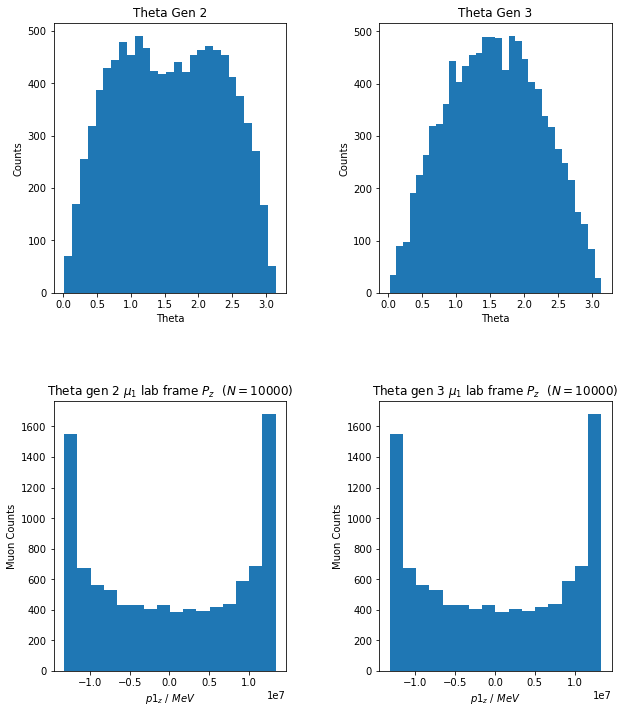

In [291]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
plt.subplots_adjust(bottom=0.1,  
                    top=1, 
                    wspace=0.4, 
                    hspace=0.4)
theta_test =thetaGen2(Num,s)
ax[0,0].hist(theta_test, bins='auto')
ax[0,0].set_xlabel("Theta")
ax[0,0].set_ylabel("Counts")
ax[0,0].set_title("Theta Gen 2")

theta_test3 = thetaGen3(Num,s)
ax[0,1].hist(theta_test3, bins='auto')
ax[0,1].set_xlabel("Theta")
ax[0,1].set_ylabel("Counts")
ax[0,1].set_title("Theta Gen 3")

df2=mc(s,Num, thetaGen2) #Full theta gen 2 MC
p1_z2= df2['$p^{\mu}_{1z}$']
ax[1,0].hist(p1_z, bins='auto')
ax[1,0].set_xlabel("$p1_z$ / $MeV$")
ax[1,0].set_ylabel("Muon Counts")
ax[1,0].set_title('Theta gen 2 $\mu_1$ lab frame $P_z$  ($N='+str(Num)+')$')

#leaving the slow data frame on the last section to reduce loading
p1_z= df['$p^{\mu}_{1z}$']
ax[1,1].hist(p1_z, bins='auto')
ax[1,1].set_xlabel("$p1_z$ / $MeV$")
ax[1,1].set_ylabel("Muon Counts")
ax[1,1].set_title('Theta gen 3 $\mu_1$ lab frame $P_z$  ($N='+str(Num)+')$')